# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    return (xs.mean() * ys.mean() - (xs*ys).mean()) / (xs.mean()**2 - (xs*xs).mean())


# use the slope function with intercept formula to return calculate slope and intercept from data points
def calc_intercept(xs,ys):
    return ys.mean() - calc_slope(xs,ys)*xs.mean() 

def best_fit(xs,ys):
    return (round(calc_slope(xs,ys), 2), round(calc_intercept(xs,ys), 2))

def reg_line (m, c, xs):
    return m*xs + c

# Calculate sum of squared errors between regression and mean line 
def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    return ((y_a - y_b)**2).sum()

# Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    y_mean = np.array([Y.mean()]*len(Y))
    rss = sq_err(y_real,y_predicted)
    tss = sq_err(y_real,y_mean)
    return round(1 - rss/tss, 2)

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33



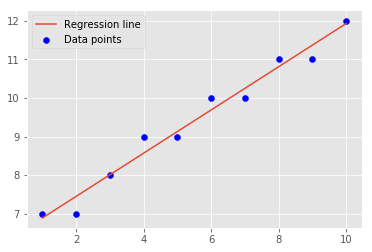

In [14]:
m, y_intercept = best_fit(X, Y)

y_predicted = reg_line(m, y_intercept, X)
rss = r_squared(Y, y_predicted)


print('''
# Basic Regression Diagnostics
# ----------------------------
# Slope: {}
# Y-Intercept: {}
# R-Squared: {}
# ----------------------------
# Model: Y = {} * X + {}
'''.format(m, y_intercept, rss, m, y_intercept))

# Plot data and regression line
plt.scatter(x=X, y=Y, c='b', label='Data points')
plt.plot(X, y_predicted, label='Regression line')
plt.legend();

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


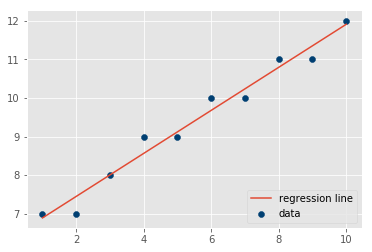

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

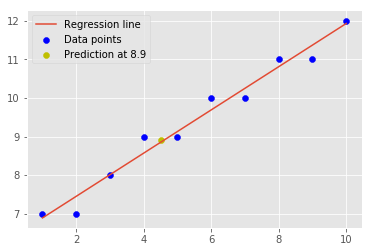

In [20]:
# Make prediction using given value and visualize on the scatter plot
plt.scatter(x=X, y=Y, c='b', label='Data points')
plt.plot(X, y_predicted, label='Regression line')

predicted_y_value = round(4.5 * m + y_intercept, 1)
plt.scatter(4.5, predicted_y_value, c='y', label='Prediction at {}'.format(predicted_y_value))
plt.legend();

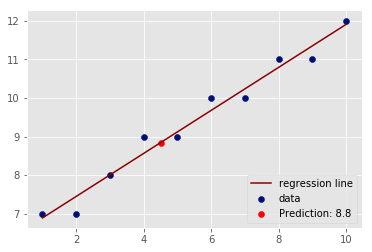

In [30]:
import pandas as pd

height_weight_df = pd.read_csv('heightweight.csv')
X = np.array(height_weight_df['height'], dtype=np.float64)


Y = np.array(height_weight_df['weight'], dtype=np.float64)
X

array([68., 71., 61., 69., 71., 58., 72., 73., 58., 74., 61., 59., 69.,
       68., 64., 69., 72., 66., 65., 69.])


# Basic Regression Diagnostics
# ----------------------------
# Slope: 5.54
# Y-Intercept: -204.48
# R-Squared: 0.96
# ----------------------------
# Model: Y = 5.54 * X + -204.48



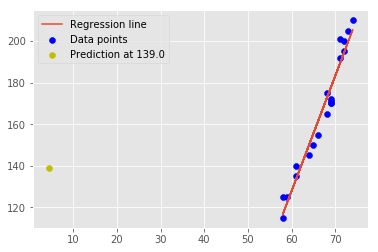

In [29]:
m, y_intercept = best_fit(X, Y)

y_predicted = reg_line(m, y_intercept, X)
rss = r_squared(Y, y_predicted)


print('''
# Basic Regression Diagnostics
# ----------------------------
# Slope: {}
# Y-Intercept: {}
# R-Squared: {}
# ----------------------------
# Model: Y = {} * X + {}
'''.format(m, y_intercept, rss, m, y_intercept))

# Plot data and regression line
plt.scatter(x=X, y=Y, c='b', label='Data points')
plt.plot(X, y_predicted, label='Regression line')
predicted_y_value = round(62 * m + y_intercept, 1)
plt.scatter(4.5, predicted_y_value, c='y', label='Prediction at {}'.format(predicted_y_value))
plt.legend();

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 